<a href="https://colab.research.google.com/github/adhishagc/Genetic-Algorithm-using-Python-Example/blob/master/Genetic_Algorithm_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Debug Process**


1. Check algorithm structure is available. Each phase
	1. Create Population
	2. Evaluate Fitness of Each Chromosome in the Population
	3. Create New Population by :
		1. Select 2 Parents
		2. Crossover
		3. Mutate
		4. Replace to the Population
	4. Test if End condition is satisified
	5. If Yes,end otherwise iterate with the new Population
	
2. Functionality of each section


In [0]:
#importing libraries
import pandas as pd
import numpy as np
import random as random
from matplotlib import pyplot as plt

In [6]:
#access to google drive
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
#load dataset to a dataframe
df = pd.read_csv('/content/gdrive/My Drive/Genetic Algorithms/Assignment 01/dataset.csv')

In [8]:
#view dataset
df

,file,size,duration
0,1,800,121
1,2,700,95
2,3,650,85
3,4,750,100
4,5,600,78
5,6,900,125
6,7,950,130
7,8,875,128
8,9,1050,135
9,10,1500,120


The below section contains the Function definitions used in the Program.

### **Population Creation Function**

In [0]:
# function for init population
def createInitPop(popSize):
  chrom = [i for i in range(1,popSize+1)]
  #emp = [0 for i in range(0,popSize)]
  values ={
    'chromosome':chrom,
    'file 1':[random.randint(0, 1) for _ in range(popSize)],
    'file 2':[random.randint(0, 1) for _ in range(popSize)],
    'file 3':[random.randint(0, 1) for _ in range(popSize)],
    'file 4':[random.randint(0, 1) for _ in range(popSize)],
    'file 5':[random.randint(0, 1) for _ in range(popSize)],
    'file 6':[random.randint(0, 1) for _ in range(popSize)],
    'file 7':[random.randint(0, 1) for _ in range(popSize)],
    'file 8':[random.randint(0, 1) for _ in range(popSize)],
    'file 9':[random.randint(0, 1) for _ in range(popSize)],
    'file 10':[random.randint(0, 1) for _ in range(popSize)],
  }
  return pd.DataFrame(values)  

### **Evaluate Fitness Function**

In [0]:
#Evaluate Fitness Function
def EvaluateFitness(chromosome,df,popSize):
  #fitness array
  fitness = {
      'chromosome':[x for x in range(1,popSize+1)],
      'fitness':[0 for x in range(0,popSize)]
  }
  
  #size array
  filesize = {
      'chromosome':[x for x in range(1,popSize+1)],
      'size':[0 for x in range(0,popSize)]
  }

  #convert to dataframe
  fitness = pd.DataFrame(fitness)
  filesize = pd.DataFrame(filesize)
  
  #total file size
  #totFileSize =[]

  #total file size and duration
  size=0
  duration=0

  #shape of the chromosome / population dataframe
  rows,col = chromosome.shape
  
  for i in range(rows):
    for j in range(1,11):
      if(chromosome.iloc[i,j] ==1):
        size += df.iloc[j-1,1]
        duration +=df.iloc[j-1,2]
    
    if(size<=4500):
      #fine
      fitness.loc[i,'fitness'] = duration
      filesize.loc[i,'size'] = size
      
    else:
      fitness.loc[i,'fitness'] = duration*0.5
      filesize.loc[i,'size'] = size
    size = 0
    duration = 0

  return fitness, filesize      

### **Rank Selection Function**

In [0]:
#Rank Selection Function
def rankSelection(chromosome,fitness,popSize):
  
  rankTotal = sum(x for x in range(0,popSize))
  #totRandom = random.uniform(0,rankTotal) #CREEPY Something is here
  totRandom = random.uniform(0,1)*rankTotal
  tot=0
  fitness_sorted = fitness.sort_values(by=['fitness'])
  for i in fitness_sorted.index:
    tot += fitness_sorted.loc[i,'fitness']
    if(tot>=totRandom):
      global fifo_index
      fifo_index = i
      return chromosome.loc[i,:],i
 

### **Binary Represented N Point Crossover Function Generalized**

In [0]:
def binary_rep_n_point_crossover(n,parent1,parent2):
  
  parent1_parts = [] #this list contains parent 1 partwise split sections based on the random values generated
  parent2_parts = [] #this list contains parent 2 partwise split sections based on the random values generated
  random_vals = [] #list to store the generated random values
  start_pos = 0 #start position of the spiliting parents
  random_position = start_pos+1 #initial random position
  L_1 = 10-1 # the random value range should be in between 1 to 10-1 which is L-1
 
  #counting variable for the swap
  count = 1

  parent1_array = parent1.values
  parent2_array = parent2.values


  for n_times in range(n+1):
    #random position is generated here. This random position will be the place
    #where the chromosome will be split
    random_position = random.randint(random_position,L_1)

    #The generated random values are stored in this list
    random_vals.append(random_position)


    if(n_times == n):
      parent1_parts.append(parent1_array[start_pos:L_1+1])
      parent2_parts.append(parent2_array[start_pos:L_1+1])

    else:

      parent1_parts.append(parent1_array[start_pos:random_position])
      parent2_parts.append(parent2_array[start_pos:random_position])

    start_pos = random_position
    #random_position +=1


  for i in range(len(parent1_parts)):
    if(count%2==0):
      temp = parent1_parts[i]
      parent1_parts[i] = parent2_parts[i]
      parent2_parts[i] = temp
      count +=1
    else:
      #nothing
      count += 1


  offspring1_array = np.concatenate(([parent1_parts[i] for i in range(len(parent1_parts))]))
  offspring2_array = np.concatenate(([parent2_parts[i] for i in range(len(parent1_parts))]))
  
  return offspring1_array,offspring2_array


### **Crossover and Mutation Function**

In [0]:
#crossover function
def doCrossoverMutate(chromosome,fitness,popSize):
  parent1,i = rankSelection(chromosome,fitness,popSize)
  parent2,i = rankSelection(chromosome,fitness,popSize)
  
  #random crossover point
  crossPoint = random.randint(1,10)
  
  c1p1 = parent1[1:crossPoint]
  c1p2 = parent1[crossPoint:11]
  
  child =c1p1.append(c1p2)
  
  child = bitflip(child)
  return child

In [0]:
def getFitness(chromosome):
  total_size = 0
  total_duration = 0
  
  for i in range(len(chromosome)):
    if(chromosome[i]==1):
      total_size += df.loc[i,'size']
      total_duration += df.loc[i,'duration']
  
  if(total_size>=4500):
    fitness = total_duration*0.5
    return fitness,total_size
  else:
    fitness = total_duration
    return fitness,total_size

In [0]:
def getDetails(chromosome):
  total_size = 0
  total_duration = 0
  
  for i in range(len(chromosome)):
    if(chromosome[i]==1):
      total_size += df.loc[i,'size']
      total_duration += df.loc[i,'duration']
      
  return total_duration, total_size

### **BitFlip of the Mutation**

In [0]:
def bitflip(chromosome):
  #generate random bit array
  bits = [random.uniform(0,1) for _ in range(10)] #range size is the number of files
  
  for i in range(10):
    if(bits[i]<0.3):
      if(chromosome[i] == 0):
        chromosome[i] = 1
      else:
        chromosome[i] = 0
  
  return chromosome
      

### **Replace the Offspring with the Population**



In [0]:
def replace_with_offspring(fifo_index,offSpring1,offSpring2):
#   chromosome.iloc[fifo_index,1:] = offSpring.values
#   chromosome.iloc[fifo_index+1,1:] = offSpring.values
    chromosome.iloc[fifo_index,1:] = offSpring1
    chromosome.iloc[fifo_index+1,1:] = offSpring2
  

### **Iterate the Model**



In [0]:
def trainModel(n,n_point):
  epoch = 0
  fit = pd.DataFrame()
  filesize = pd.DataFrame()
  parent1 = pd.DataFrame()
  parent2 = pd.DataFrame()
  for i in range(n):  
    fitness, totFileSize = EvaluateFitness(chromosome,df,popSize)
    #offSpring = doCrossoverMutate(chromosome,fitness,popSize)
    #offspring1,offspring2 = binary_rep_n_point_crossover(n)
    
    
 
    parent1, parent1_id = rankSelection(chromosome,fitness,popSize)
    parent2, parent2_id = rankSelection(chromosome,fitness,popSize)
    offspring1,offspring2 = binary_rep_n_point_crossover(n_point,parent1[1:],parent2[1:])
    
    offspring1 = bitflip(offspring1)
    offspring2 = bitflip(offspring2)
    
    #replace parents
    chromosome.iloc[parent1_id,1:] = offspring1
    chromosome.iloc[parent2_id,1:] = offspring2
    
    fit = fitness
    filesize = totFileSize
    print(epoch)
    epoch +=1
    #return parent1,parent2,offspring1,offspring2
  return fit,filesize,parent1,parent2    
    #replace_with_offspring(fifo_index,offspring1,offspring2)
    #return chromosome.iloc[fifo_index,1:]

### **Run the Program**

In [170]:
#initialize
popSize = 100 #population size
#creation of population of Chromosomes
chromosome = createInitPop(popSize)

#fifo index relates to the index to be removed. -1 is the initial value
fifo_index = -1

#iterate model and return the solution
#parent1, parent2, offspring1, offspring2 = trainModel(100)

# number_of_elements = 1000
# for i in range(number_of_elements):
#     if i % 100 == 0:
#         print(i)
#     trainModel(100) #Here should be the code that does the computation.
# print('Done')
#for i in tqdm_notebook(range(100)):

iterations = 100
n_point = 1
fit,sizeK,parent1,parent2 = trainModel(iterations,n_point)


# epoch = 0
# finalDuration = []
# finalSize = []

# state = True
 
# while(state):
#     trainModel(iterations,epoch)
#     epoch +=1
#     for i in range(popSize):
#       duration,size = getDetails(chromosome.iloc[i,1:].values)
#       finalDuration.append(duration)
#       finalSize.append(size)
    
#     if(finalSize[finalDuration.index(max(finalDuration))] <4500):
#       #stop
#       state = False
#     else:
#       #continue
#       finalDuration.clear()
#       finalSize.clear()
    

finalDuration = []
finalSize = []

for i in range(popSize):
  duration,size = getFitness(chromosome.iloc[i,1:].values)
  finalDuration.append(duration)
  finalSize.append(size)
  
  

# parent1_fitness = getFitness(parent1)
# parent2_fitness = getFitness(parent2)
# offspring1_fitness = getFitness(offspring1)
# offspring2_fitness = getFitness(offspring2)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


In [0]:
#fit

In [172]:
parent1

chromosome    51
file 1         1
file 2         0
file 3         1
file 4         1
file 5         1
file 6         0
file 7         1
file 8         0
file 9         0
file 10        1
Name: 50, dtype: int64

In [173]:
parent2

chromosome    40
file 1         0
file 2         1
file 3         0
file 4         0
file 5         0
file 6         1
file 7         1
file 8         0
file 9         1
file 10        1
Name: 39, dtype: int64

In [174]:
finalDuration.index(max(finalDuration))

6

In [175]:
finalSize[finalDuration.index(max(finalDuration))]

4475

In [176]:
finalDuration[finalDuration.index(max(finalDuration))]

613

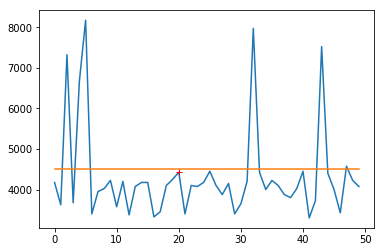

In [169]:
plt.plot([x for x in range(popSize)],[finalSize[x] for x in range(len(finalSize))])
plt.plot([finalDuration.index(max(finalDuration))],[finalSize[finalDuration.index(max(finalDuration))]],'r+')
plt.plot([x for x in range(popSize)],[4500 for x in range(len(finalSize))])

In [60]:
max(finalDuration)

944

In [25]:
chromosome.iloc[finalFitness.index(max(finalFitness)),1:].values

NameError: ignored

In [0]:
parent1_fitness

In [0]:
parent2_fitness

In [0]:
offspring1_fitness

In [0]:
offspring2_fitness

In [0]:
#nn = np.array([8,8,8,8,8,8,8,8,8,8])

In [0]:
#chromosome.iloc[0,1:] = nn

In [0]:
#chromosome

## **Testing Area**

In [0]:
from tqdm import tqdm_notebook
from time import sleep

for i in tqdm_notebook(range(100)):
    sleep(.05)

In [0]:
population

In [0]:
parent1 = population.iloc[10,1:]

In [0]:
parent2 = population.iloc[11,1:]

In [0]:
child1, child2 = binary_rep_n_point_crossover(1,parent1,parent2)

In [0]:
child1

In [0]:
child2

In [0]:
child1 = bitflip(child1)

In [0]:
child2 = bitflip(child2)

In [0]:
fitness

In [0]:
child1.values